## EDA 
## Swire Coca-Cola project : Anusha Vivekanand

In [29]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('IWC_Work_Orders_Extract.csv')

In [26]:
data.shape

(1427264, 25)

In [3]:
data.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR AT CAN CODER,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,Unplanned,BROKEN CONVEYOR RAIL,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,Unplanned,REPLACED SONIC AIR BLOWER BELT,Corrective Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31


In [4]:
print(data.describe())


           ORDER_ID  ACTUAL_WORK_IN_MINUTES  MAINTENANCE_ITEM  EQUIPMENT_ID
count  1.427264e+06            1.427264e+06     152594.000000  2.917950e+05
mean   4.561470e+10            8.862968e+01     115846.807954  3.002609e+08
std    8.387114e+10            8.037915e+02      71325.255687  5.581645e+06
min    1.000219e+08            0.000000e+00      39801.000000  2.000871e+08
25%    4.022602e+08            1.200000e+01      41046.000000  3.000092e+08
50%    7.044271e+08            4.800000e+01     112995.000000  3.000178e+08
75%    1.002343e+09            9.000000e+01     134702.000000  3.000269e+08
max    9.000001e+11            3.301848e+05     346352.000000  4.000290e+08


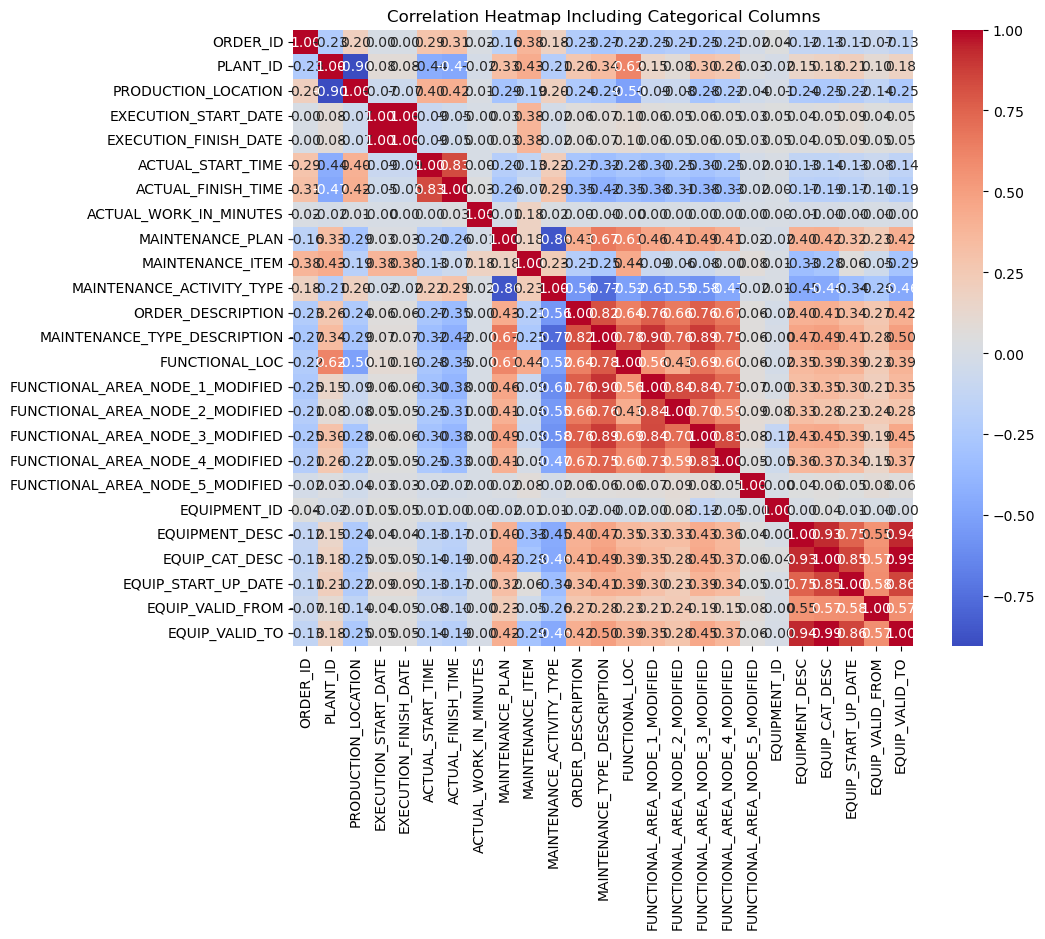

In [5]:
# Convert categorical columns to numeric codes if necessary
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

# Compute the correlation matrix for the entire DataFrame
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap Including Categorical Columns')
plt.show()


**In the correlation heatmap from our case study, we observe compelling relationships among several dataset features that are particularly insightful for predictive maintenance planning. For instance, the strong correlation (0.93) between `EQUIP_CAT_DESC` and `EQUIP_VALID_TO` suggests that the category of equipment significantly influences its operational validity period. This relationship indicates that specific equipment categories may require more frequent reviews or replacements, which is crucial for optimizing maintenance schedules and resource allocation. Additionally, the correlation seen with `MAINTENANCE_ACTIVITY_TYPE` across various attributes highlights its impact on operational efficiencies, reinforcing the need for strategic maintenance planning to enhance overall productivity and reduce potential downtimes in manufacturing processes.**

In [6]:
# Display data types of each column
print(data.dtypes)


ORDER_ID                             int64
PLANT_ID                              int8
PRODUCTION_LOCATION                   int8
EXECUTION_START_DATE                 int16
EXECUTION_FINISH_DATE                int16
ACTUAL_START_TIME                    int32
ACTUAL_FINISH_TIME                   int32
ACTUAL_WORK_IN_MINUTES             float64
MAINTENANCE_PLAN                     int16
MAINTENANCE_ITEM                   float64
MAINTENANCE_ACTIVITY_TYPE             int8
ORDER_DESCRIPTION                    int32
MAINTENANCE_TYPE_DESCRIPTION          int8
FUNCTIONAL_LOC                       int16
FUNCTIONAL_AREA_NODE_1_MODIFIED       int8
FUNCTIONAL_AREA_NODE_2_MODIFIED       int8
FUNCTIONAL_AREA_NODE_3_MODIFIED      int16
FUNCTIONAL_AREA_NODE_4_MODIFIED       int8
FUNCTIONAL_AREA_NODE_5_MODIFIED       int8
EQUIPMENT_ID                       float64
EQUIPMENT_DESC                       int16
EQUIP_CAT_DESC                        int8
EQUIP_START_UP_DATE                   int8
EQUIP_VALID

In [7]:
# Displaying summary statistics for all columns including categorical
summary_stats = data.describe(include='all')
print(summary_stats)


           ORDER_ID      PLANT_ID  PRODUCTION_LOCATION  EXECUTION_START_DATE  \
count  1.427264e+06  1.427264e+06         1.427264e+06          1.427264e+06   
mean   4.561470e+10  1.564881e+00         3.328795e+00          1.606953e+03   
std    8.387114e+10  1.443127e+00         1.509301e+00          8.012533e+02   
min    1.000219e+08  0.000000e+00         0.000000e+00          0.000000e+00   
25%    4.022602e+08  1.000000e+00         2.000000e+00          9.260000e+02   
50%    7.044271e+08  1.000000e+00         4.000000e+00          1.595000e+03   
75%    1.002343e+09  2.000000e+00         4.000000e+00          2.323000e+03   
max    9.000001e+11  5.000000e+00         5.000000e+00          2.955000e+03   

       EXECUTION_FINISH_DATE  ACTUAL_START_TIME  ACTUAL_FINISH_TIME  \
count           1.427264e+06       1.427264e+06        1.427264e+06   
mean            1.607662e+03       3.009400e+04        2.764902e+04   
std             8.013427e+02       2.267953e+04        2.272502e+0

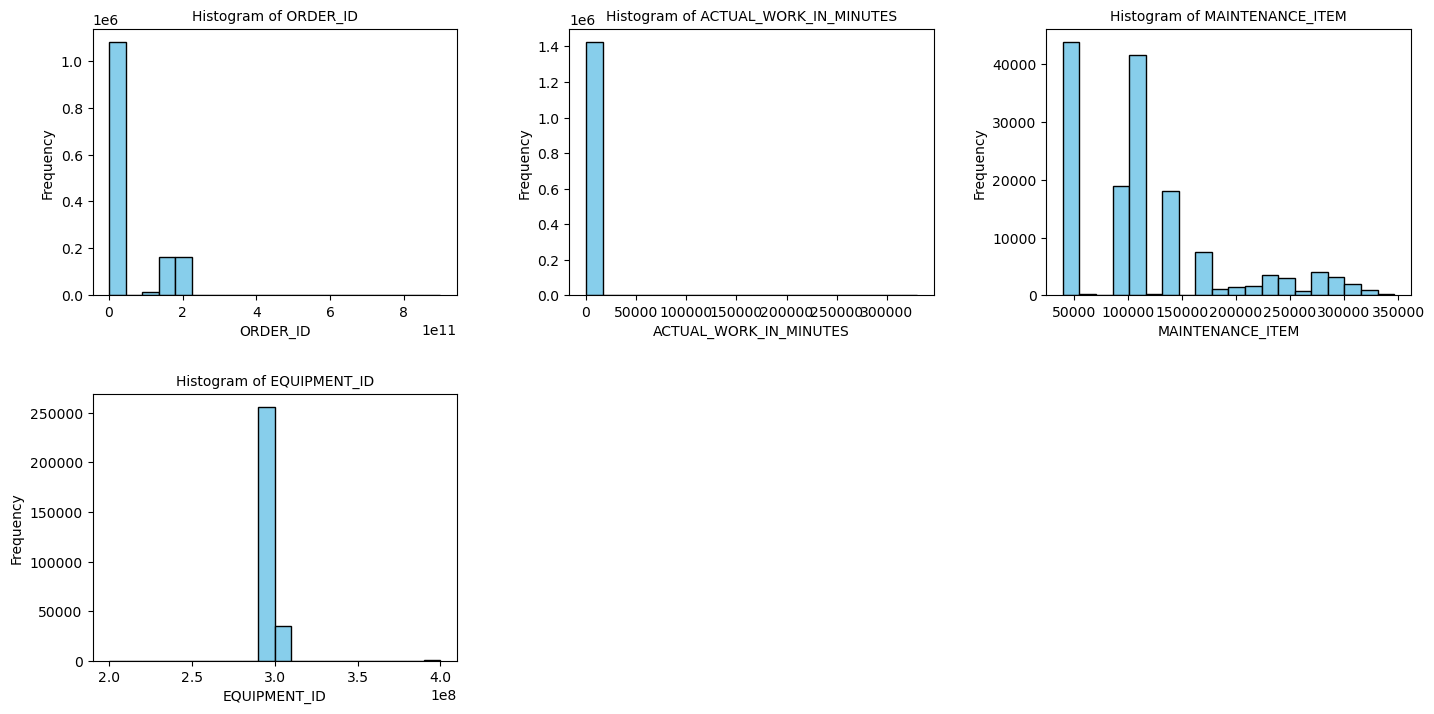

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('IWC_Work_Orders_Extract.csv')

# Select only numerical columns for histogram plotting
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Define the number of rows and columns for the subplots based on the number of numerical columns
n_cols = 3  # You can adjust the number of columns per row
n_rows = (len(numerical_data.columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure object and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.tight_layout(pad=5.0)

# Flatten axes array
axes = axes.ravel()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(numerical_data.columns):
    axes[i].hist(numerical_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If there are any leftover axes, turn them off
for ax in axes[len(numerical_data.columns):]:
    ax.axis('off')

# Display the plot
plt.show()


**The histograms reveal distinct patterns in the Swire Coca-Cola maintenance data, with the `ORDER_ID` and `EQUIPMENT_ID` showing a high concentration of values in specific ranges, indicating that certain orders and equipment are repeatedly involved in maintenance activities. This pattern suggests a potential focus area for preventive maintenance strategies, particularly for the equipment identified with frequent issues. The `ACTUAL_WORK_IN_MINUTES` histogram exhibits a heavy skew towards shorter durations, indicating that most maintenance tasks are resolved quickly, which might reflect efficient resolution processes or minor maintenance issues that do not require extensive downtime.**

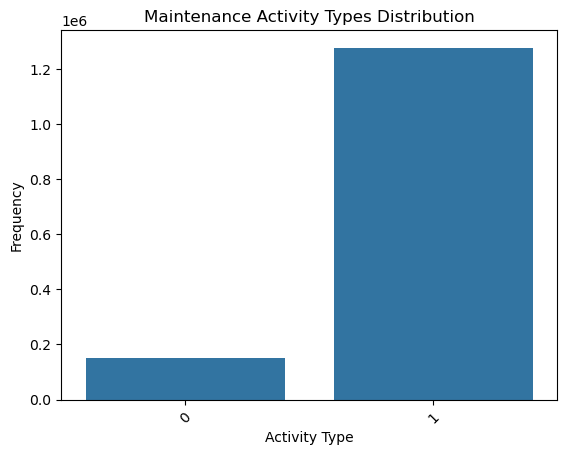

In [9]:
#Count Plot for MAINTENANCE_ACTIVITY_TYPE
sns.countplot(x='MAINTENANCE_ACTIVITY_TYPE', data=data)
plt.title('Maintenance Activity Types Distribution')
plt.xlabel('Activity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


**The histogram clearly highlights a significant imbalance between planned (0) and unplanned (1) maintenance activities at Swire Coca-Cola, with unplanned maintenance vastly outnumbering planned efforts. This distribution suggests that the company experiences a high frequency of reactive maintenance, which may indicate gaps in their preventive maintenance strategy. Such a trend underscores the potential need for enhancing predictive maintenance practices to better anticipate and mitigate equipment failures before they escalate, thereby shifting the balance towards more planned maintenance activities for improved operational stability.**

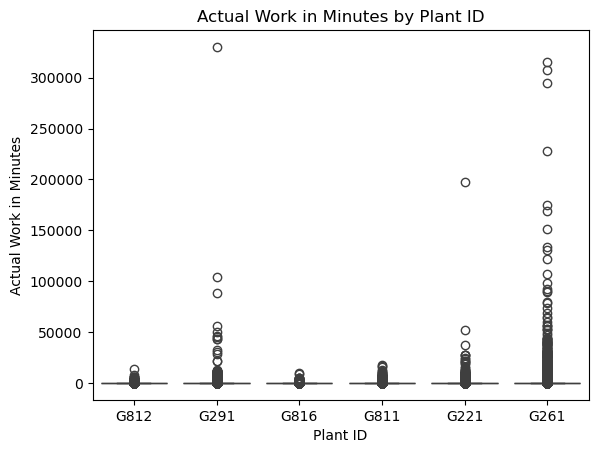

In [32]:
#Box Plot of ACTUAL_WORK_IN_MINUTES by PLANT_ID
sns.boxplot(x='PLANT_ID', y='ACTUAL_WORK_IN_MINUTES', data=data)
plt.title('Actual Work in Minutes by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Actual Work in Minutes')
plt.show()


**The box plot visualizes the distribution of actual work times across different plants, highlighting a general trend where most maintenance tasks are completed relatively quickly. However, notable outliers are evident, particularly at plants like Silverstone (G261), Suzuka (G221), and Monza (G291), where some tasks take an unusually long time. These outliers significantly skew the data, resulting in a mean downtime that is substantially higher than the median. This suggests that while most maintenance can be handled efficiently, there are exceptional cases that may benefit from further investigation to optimize processes and reduce extended downtimes.**

In [28]:
# Missing data proportion per variable
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
EQUIP_VALID_TO                     94.433616
EQUIP_VALID_FROM                   94.433616
EQUIP_START_UP_DATE                94.433616
EQUIP_CAT_DESC                     94.433616
EQUIPMENT_DESC                     94.433616
MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
ORDER_DESCRIPTION                  79.557601
FUNCTIONAL_LOC                     79.556550
EQUIPMENT_ID                       79.555639
MAINTENANCE_TYPE_DESCRIPTION       79.555639
PLANT_ID                            0.000000
MAINTENANCE_ACTIVITY_TYPE           0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_START_TIME                   0.000000
EXECUTION_FINISH_DATE               0.000000
EXECUTION_

**Since we have more than 70% of data missing, we can try to check for patterns in the remaining data to see if we are able to scale it to other features.**

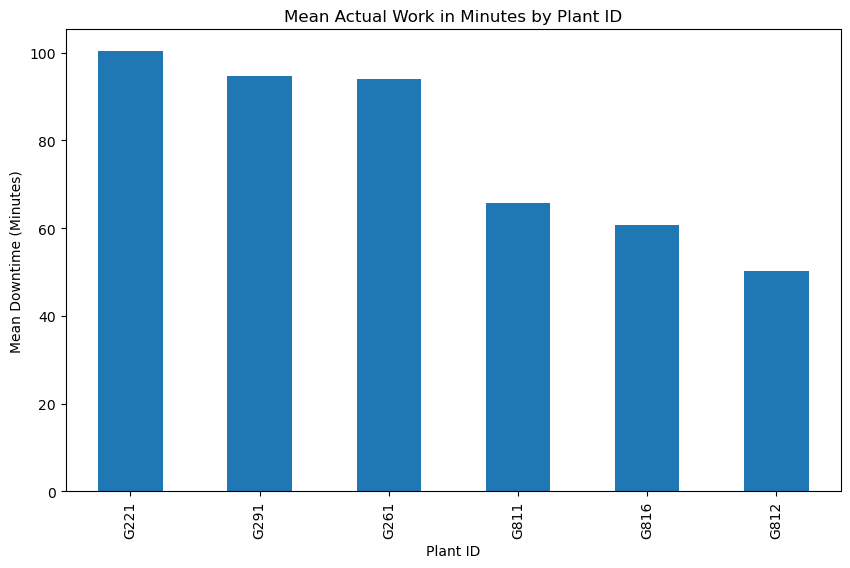

In [30]:
grouped_data_plant = data.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean()

# Sort values to make the plot more readable
grouped_data_plant = grouped_data_plant.sort_values(ascending=False)

# Plot the mean downtime by plant
plt.figure(figsize=(10,6))
grouped_data_plant.plot(kind='bar')
plt.title('Mean Actual Work in Minutes by Plant ID')
plt.ylabel('Mean Downtime (Minutes)')
plt.xlabel('Plant ID')
plt.xticks(rotation=90)  # Rotate plant IDs for better readability
plt.show()

**This bar chart reveals that mean downtime varies significantly across different plants, with Plant G221 and G291 experiencing longer durations, indicating a possible need for targeted maintenance strategies to enhance operational efficiencies at these locations.**

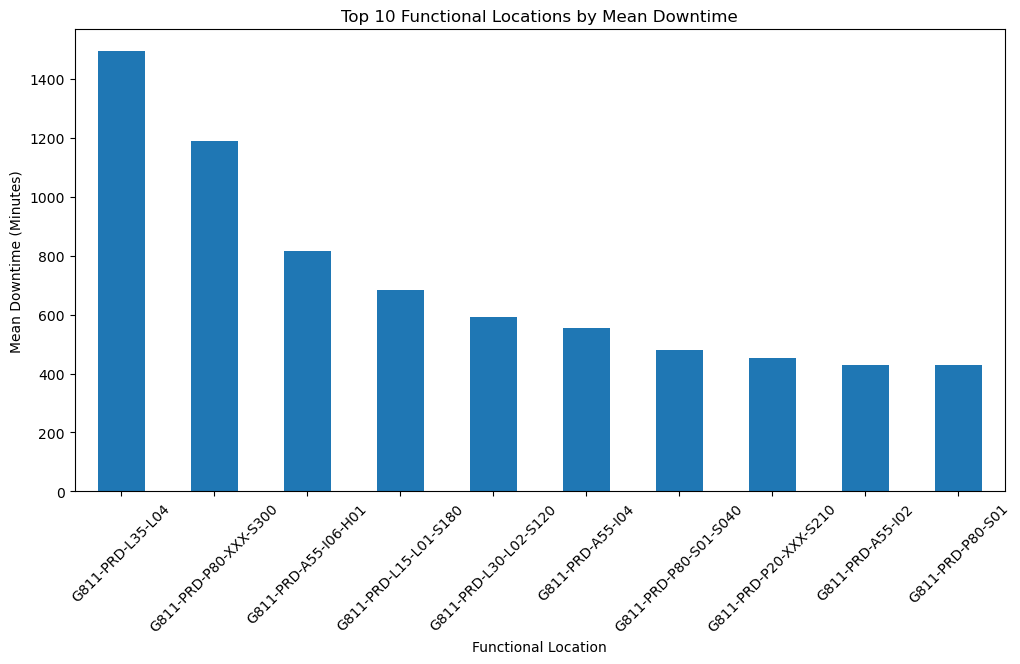

In [31]:
# Group by functional location and calculate mean downtime
grouped_functional_loc = data.groupby('FUNCTIONAL_LOC')['ACTUAL_WORK_IN_MINUTES'].mean().sort_values(ascending=False).head(10)

# Plot top functional locations by mean downtime
plt.figure(figsize=(12, 6))
grouped_functional_loc.plot(kind='bar')
plt.title('Top 10 Functional Locations by Mean Downtime')
plt.ylabel('Mean Downtime (Minutes)')
plt.xlabel('Functional Location')
plt.xticks(rotation=45)
plt.show()

**The disparities in downtime across functional locations suggest specific areas that are particularly problematic and may benefit from focused improvements in maintenance practices to reduce the mean downtime and enhance overall productivity.**

In [19]:
#!pip install wordcloud matplotlib nltk


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushavivekanand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


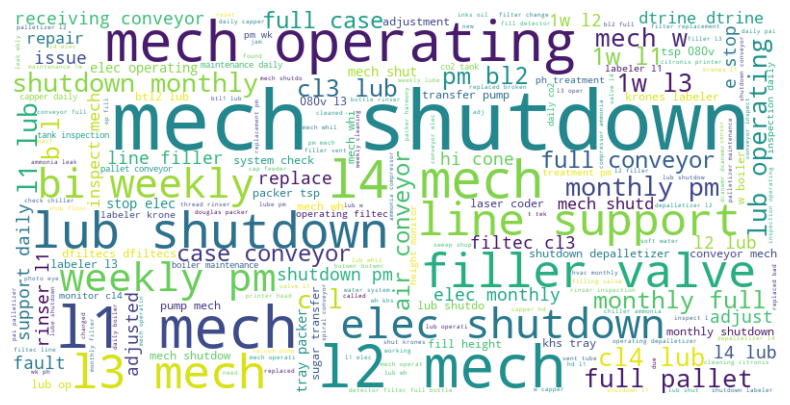

In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Load the dataset
data = pd.read_csv('IWC_Work_Orders_Extract.csv')

# Ensure all descriptions are treated as strings and combine into one large string
all_descriptions = " ".join(str(description) for description in data['ORDER_DESCRIPTION'].dropna())

# Convert to lowercase to ensure uniformity
all_descriptions = all_descriptions.lower()

# Download and remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_descriptions.split() if word not in stop_words]
all_descriptions = ' '.join(filtered_words)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**The word cloud derived from the maintenance records vividly highlights "shutdown," "mech" (mechanical), and "operating" as the most frequent terms in the maintenance descriptions at Swire Coca-Cola's facilities, suggesting a significant focus on mechanical issues and scheduled shutdowns for maintenance. This visualization underscores the critical nature of mechanical maintenance in operational continuity and the prevalence of planned maintenance activities, pointing to a proactive approach in managing equipment reliability and minimizing unplanned downtime.**

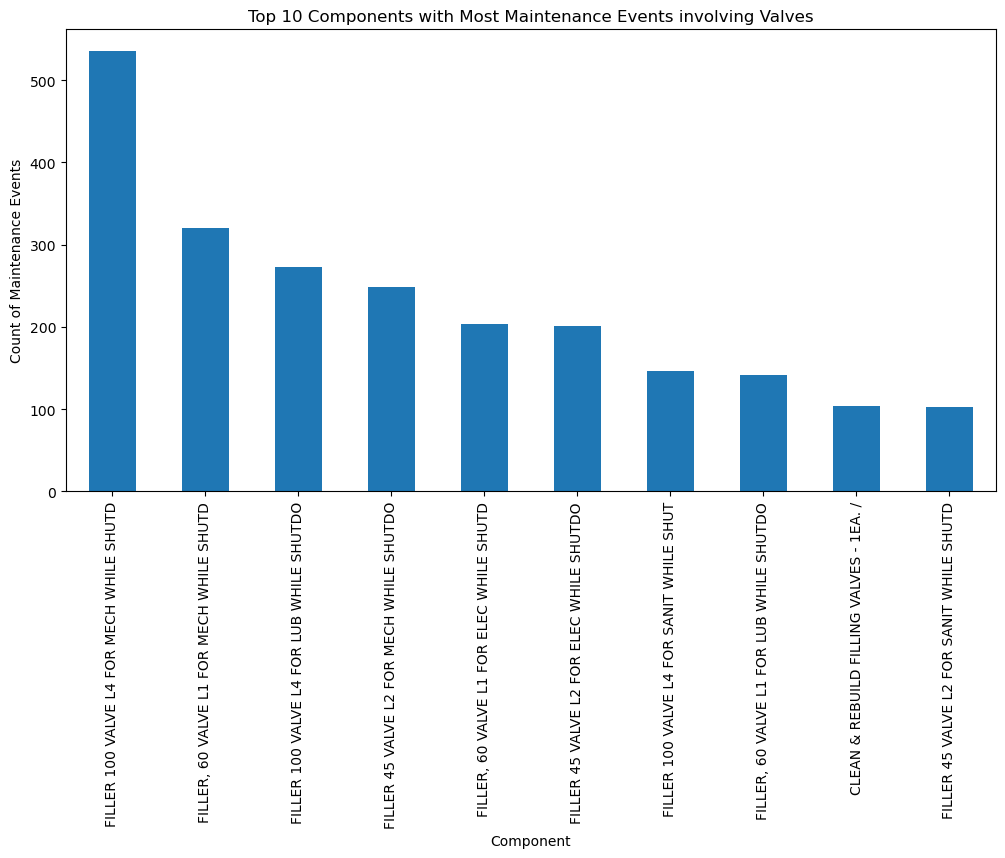

In [25]:
import matplotlib.pyplot as plt

# Define components of interest for valve
components_of_interest = ['valve']

# Filter the dataset for relevant components in ORDER_DESCRIPTION, excluding blank entries
filtered_data = data[data['ORDER_DESCRIPTION'].str.contains('|'.join(components_of_interest), na=False, case=False)]

# Count number of maintenance events by component
if not filtered_data.empty:  # Check if filtered data is not empty
    component_failure_count = filtered_data['ORDER_DESCRIPTION'].value_counts()

    # Plot top 10 components with the most failures
    plt.figure(figsize=(12, 6))
    component_failure_count.head(10).plot(kind='bar')
    plt.title('Top 10 Components with Most Maintenance Events involving Valves')
    plt.ylabel('Count of Maintenance Events')
    plt.xlabel('Component')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No data found for the specified components.")


**This bar chart highlights the components involving valves that most frequently require maintenance, suggesting a critical area for predictive maintenance interventions to prevent frequent breakdowns and improve the reliability of these components in the operational process.**

## Summary
In the comprehensive Exploratory Data Analysis (EDA) conducted on the Swire Coca-Cola maintenance data, several key insights and outcomes emerged, which are summarized as follows:

1. **Prevalence of Unplanned Maintenance**:
   - The analysis revealed a significant predominance of unplanned over planned maintenance activities, suggesting a predominantly reactive maintenance strategy. This underscores the necessity for advancing predictive maintenance frameworks to preempt equipment failures and enhance the proportion of planned maintenance interventions.

2. **Variability in Downtime Across Plants**:
   - Notable disparities in the average actual work minutes across different plants were observed, particularly at Plants G221 and G291, which experienced extended downtimes. This variation indicates a potential for optimizing maintenance strategies at specific plants to minimize downtime and improve operational efficiency.

3. **Critical Functional Locations**:
   - Certain locations consistently exhibited higher downtimes, identifying them as critical points that may benefit from targeted maintenance efforts to boost productivity and decrease downtime impacts.

4. **Frequent Maintenance for Specific Components**:
   - Valve-related components were frequently involved in maintenance, highlighting them as crucial for predictive maintenance initiatives to enhance component reliability and minimize breakdown frequencies.

5. **Insights from Word Cloud Analysis**:
   - Dominant terms like "shutdown," "mech," and "operating" from the maintenance records emphasized a strong focus on mechanical issues and planned maintenance shutdowns. This reflects a proactive maintenance management approach, aiming to uphold equipment reliability.

6. **Significance of Outliers in Maintenance Tasks**:
   - The occurrence of outliers in maintenance durations, especially in Plants G261, G221, and G291, suggested that some maintenance tasks took significantly longer than typical, pointing to potential inefficiencies or more complex issues that might require deeper investigative efforts to optimize maintenance protocols.

7. **Data Imbalance and Distribution Patterns**:
   - The analysis identified a significant imbalance between planned and unplanned maintenance, along with specific patterns in equipment and order frequencies related to maintenance tasks, suggesting areas for enhanced preventive maintenance focus.

8. **Correlational Insights for Strategic Planning**:
   - Strong correlations observed, such as between EQUIP_CAT_DESC and EQUIP_VALID_TO, indicate that the type of equipment significantly impacts its maintenance scheduling. These insights are crucial for strategic planning in maintenance operations to maximize productivity and minimize downtime.

These findings collectively highlight the critical need for Swire Coca-Cola to refine its maintenance strategies to enhance operational efficiencies, improve equipment reliability, and ultimately achieve better production continuity and cost-effectiveness.